# Machine Learning analysis for the census income data set at UCI
http://archive.ics.uci.edu/ml/datasets/Adult

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
train=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data")

In [3]:
train.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
               'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
              'hours_pw', 'native_country', 'income']
train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_pw
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data cleaning

In [4]:
train['workclass'] = train.workclass.str.strip()
train['income'] = train.income.str.strip()
train['marital_status'] = train.marital_status.str.strip()
train['race'] = train.race.str.strip()
train['sex'] = train.sex.str.strip()
train['relationship'] = train.relationship.str.strip()

## Feature Engineering

In [5]:
# create numerical columns representing the categorical data
# workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay
# , Never-worked. 
train['workclass_num'] = train.workclass.map({'?':0, 'Private':8, 'State-gov':1, 'Federal-gov':2
                                            , 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5
                                            , 'Without-pay':6, 'Never-worked':7})
train['over50K'] = np.where(train.income == '<=50K', False, True)
# marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent
# , Married-AF-spouse. 
train['marital_num'] = train['marital_status'].map({'?':0, 'Widowed':7, 'Divorced':1, 'Separated':2
                                                  , 'Never-married':3, 'Married-civ-spouse':4
                                                  , 'Married-AF-spouse':4, 'Married-spouse-absent':5
                                                   , 'Separated':6})
# race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
train['race_num'] = train.race.map({'?':0, 'White':5, 'Black':1, 'Asian-Pac-Islander':2
                                    , 'Amer-Indian-Eskimo':3, 'Other':4})
train['sex_num'] = np.where(train.sex == 'Female', 0, 1)
# relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
train['rel_num'] = train.relationship.map({'?':0, 'Not-in-family':2, 'Unmarried':2, 'Own-child':2
                                         , 'Other-relative':0, 'Husband':1, 'Wife':1})

In [6]:
train.income.value_counts()

<=50K    24719
>50K      7841
Name: income, dtype: int64

In [7]:
train.over50K.value_counts()

False    24719
True      7841
Name: over50K, dtype: int64

In [8]:
train.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_pw,workclass_num,over50K,marital_num,race_num,sex_num,rel_num
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,-0.169729,0.234039,0.202199,0.026663,0.088832,-0.244410
fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,0.037738,-0.009481,-0.004061,-0.078802,0.026882,0.009498
education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,-0.078247,0.335182,-0.027389,0.051700,0.012256,-0.027984
capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,-0.022263,0.223333,0.030314,0.016099,0.048477,-0.065813
capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,-0.015258,0.150523,0.034538,0.020751,0.045572,-0.063479
hours_pw,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.038689,0.229690,0.003319,0.052206,0.229312,-0.161909
workclass_num,-0.169729,0.037738,-0.078247,-0.022263,-0.015258,0.038689,1.000000,-0.038364,-0.050884,0.012609,-0.011282,0.035783
over50K,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,-0.038364,1.000000,0.168690,0.084973,0.215995,-0.349548
marital_num,0.202199,-0.004061,-0.027389,0.030314,0.034538,0.003319,-0.050884,0.168690,1.000000,-0.004148,0.137440,-0.353754
race_num,0.026663,-0.078802,0.051700,0.016099,0.020751,0.052206,0.012609,0.084973,-0.004148,1.000000,0.110271,-0.065798


## Modelling 

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [106]:
X = train[['workclass_num', 'education_num', 'marital_num', 'race_num', 'sex_num', 'rel_num'
          , 'age', 'hours_pw']]
y = train.over50K

In [157]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', tree.DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)))
models.append(('SVM', svm.SVC(gamma='scale')))

In [ ]:
nfolds=10
i=0
results = []
for name, model in models:
    kf = KFold(n_splits=nfolds, random_state=17)
    score = cross_val_score(model, X, y, cv=nfolds, scoring='accuracy')
    results.append((name, score))
    if score.mean() > i:
        imodel=model
        i=score.mean()
#    print(name, score.mean(), score.std())
print("Done")

## Results

In [159]:
results=np.array(results)

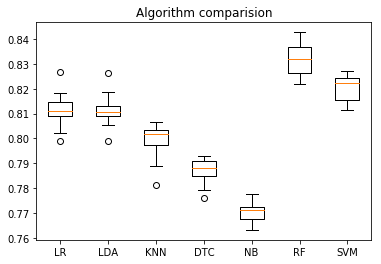

In [160]:
fig, ax = plt.subplots()
ax.boxplot(results[:,1])
ax.set_xticklabels(results[:,0])
ax.set_title('Algorithm comparision')
plt.show()

Best performing model RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)


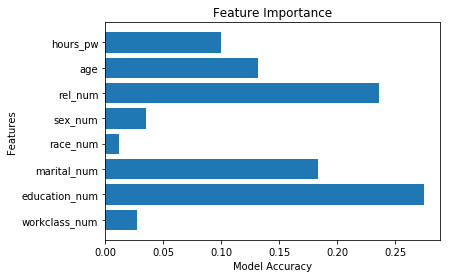

In [163]:
rf = np.array(models)[5:,1]
fi = imodel.fit(X, y).feature_importances_
pos = np.arange(len(X.columns))
print("Best performing model", imodel)
plt.barh(pos, fi)
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, (list(X)))
plt.show()